<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Aanand\AppData\Local\Temp\ipykernel_15728\1144961843.py:10: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')
C:\Users\Aanand\AppData\Local\Temp\ipykernel_15728\1144961843.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


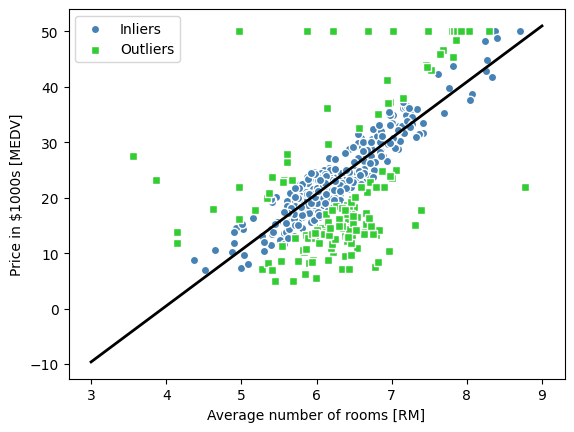

Slope: 10.099
Intercept: -39.915


C:\Users\Aanand\AppData\Local\Temp\ipykernel_15728\1144961843.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Slope: %.3f"%ransac.estimator_.coef_[0])
C:\Users\Aanand\AppData\Local\Temp\ipykernel_15728\1144961843.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f'%ransac.estimator_.intercept_)


In [1]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                'python-machine-learning-book-2nd-edition'
                '/master/code/ch10/housing.data.txt',
                sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

X=df[['RM']].values # Simple Linear Regression
# X - explainatory Variable
y=df[['MEDV']].values
ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_error',residual_threshold=5.0,random_state=0)
ransac.fit(X,y)

inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_X=np.arange(3,10,1)
line_Y_ransac=ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='steelblue',edgecolors='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolors='white',marker='s',label='Outliers')
plt.plot(line_X,line_Y_ransac,color='black',lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()
print("Slope: %.3f"%ransac.estimator_.coef_[0])
print('Intercept: %.3f'%ransac.estimator_.intercept_)